**INTEGRANTES: SAMUEL GIRALDO BUILES - JUAN ESTEBAN BERRÍO SALAZAR**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**1)CAMPO ELÉCTRICO PRODUCIDO POR UN DIPOLO ELÉCTRICO**

In [70]:
#VALORES DE LA FUENTE Y DEL PUNTO DONDE SE DESEA CALCULAR
fuente = {"q1": np.array([-2,0]),"q2":np.array([2,0])} #Aquí pueden varias las fuentes
point = np.array([1,0]) # Aquí puede variar el punto

In [71]:
k=1
def magnitud_campo(q,r):
  global k
  return k*q/r**2

**CAMPO ELECTRICO EN UN PUNTO PRODUCIDO POR UN DIPOLO**

In [72]:

q_positiva = 1             #CARGA POSITIVA DEL DIPOLO
q_negativa = -1*q_positiva #CARGA POSITIVA DEL DIPOLO
def CampoE_Total(posicionfuente_positiva,posicionfuente_negativa, punto):
  
  #CALCULOS PARA LA CARGA POSITIVA FUENTE
  DeltaR_0 = punto - posicionfuente_positiva
  magnitud_DeltaR_0 = np.sqrt(DeltaR_0[0]**2 + DeltaR_0[1]**2)
  unitarioR_0 = DeltaR_0 / magnitud_DeltaR_0
  E_0 = magnitud_campo(q_positiva,magnitud_DeltaR_0)* unitarioR_0

  #CALCULOS PARA LA CARGA NEGATIVA FUENTE
  DeltaR_1 = punto - posicionfuente_negativa
  magnitud_DeltaR_1 = np.sqrt(DeltaR_1[0]**2 + DeltaR_1[1]**2)
  unitarioR_1 = DeltaR_1 / magnitud_DeltaR_1
  E_1 = magnitud_campo(q_negativa,magnitud_DeltaR_1)* unitarioR_1

  #PRINCIPIO DE SUPERPOSICION
  E = E_0 + E_1
  Ex = E[0]
  Ey = E[1]
  return Ex,Ey
  

**CAMPO ELECTRICO PRODUCIDO POR UN DIPOLO EN UN REGION DEL PLANO**

In [73]:
def dipolo(rangox_negativo,rangox_positivo,rangoy_negativo,rangoy_positivo,paso):
  """
  INGRESAR
  rangox_negativo : Limite a la "izquierda" de x
  rangox_positivo : Limite a la "derecha" de x
  rangoy_negativo : Limite a la "inferior" de y
  rangoy_positivo : Limite a la "inferior" de y
  paso : Cada cuanto se desea graficar el campo electrico entre los límites de "x" y "y"
  """

  #DEFINIR PUNTOS DONDE QUIERO CALCULAR EL CAMPO ELÉCTRICO
  x = np.arange(rangox_negativo,rangox_positivo + 1 ,paso)
  nx = len(x)
  y = np.arange(rangoy_negativo,rangoy_positivo + 1,paso)
  ny = len(y)

  rp = np.zeros((nx*ny,2))
  k = 0
  for x_ in x:
    for y_ in y:
      rp[k]=np.array([x_,y_])
      k=k+1

  E_c = np.zeros((nx*ny,2))
  for i in range(0,len(rp)):
    E_c[i]= CampoE_Total(fuente["q1"],fuente["q2"],rp[i])
  plt.figure()
  plt.quiver(rp[:,0],rp[0:,1],E_c[:,0],E_c[:,1])
  plt.plot(fuente["q1"][0],fuente["q1"][1],"go") #CARGA NEGATIVA
  plt.plot(fuente["q2"][0],fuente["q2"][1],"ro") #CARGA POSITIVA

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


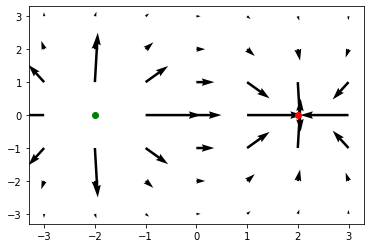

In [77]:
dipolo(-3,3,-3,3,1)

**2) CESTA EN LA CANASTA**

In [78]:
# EL CODIGO TIENE UN MARGEN DE ERROR, PUES SUPUSIMOS QUE LA CANASTA NO ERA PUNTUAL
def cesta(velocidad_0,distancia,angulo_gra):
  respuesta = "false"
  angulo_rad = angulo_gra * np.pi / 180
  t = 0
  h = 3.05
  x = 0
  y = 0
  while y>=0:
    velocidad_y = velocidad_0 * np.sin(angulo_rad)*t
    y = velocidad_0 * t + 0.5 - 9.8 * t**2
    t = t + 0.0005
    if h-1 <= y  <= h+1:
      x = velocidad_0 * np.cos(angulo_rad) * t
      if distancia-1 < x < distancia+1:
        respuesta = "true"
  return respuesta

In [80]:
cesta(20/np.sqrt(3),10,30)

'true'